# Q3 Mohd Shoaib 19A1HP027


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd ##loads the files as data frames
customers_df = pd.read_csv( "2_customerspends.csv" ) #reading the dataset 
customers_df= customers_df.drop('Customer', axis=1)
customers_df.head( 5 )

,Apparel,Beauty and Healthcare
0,21.10,0.7
1,15.23,5.5
2,5.22,18.6
3,31.10,1.8
4,6.12,21.5


In [5]:
import pandas as pd #loads the files as data frames
import numpy as np #Arithmetic liabrary of python
import matplotlib.pyplot as plt #liabrary in python for visualization
import seaborn as sn #liabrary for plotting graphs
%matplotlib inline

### A)Scatter plot for apparel, beauty & healthcare spends

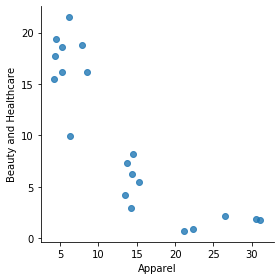

In [6]:
sn.lmplot( "Apparel", "Beauty and Healthcare", data=customers_df, fit_reg = False, size = 4 ); 
#plots beauty and heathcare , apparal

In [7]:
from sklearn.cluster import KMeans #sklearn for running carious algorithm
clusters = KMeans( 3 )
clusters.fit( customers_df ) #fits th data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
customers_df["clusterid"] = clusters.labels_
customers_df[0:5] # prints from 0 to 5

,Apparel,Beauty and Healthcare,clusterid
0,21.10,0.7,2
1,15.23,5.5,0
2,5.22,18.6,1
3,31.10,1.8,2
4,6.12,21.5,1


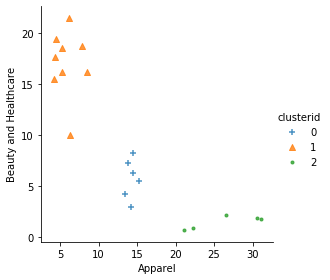

In [9]:
markers = ['+','^','.']
sn.lmplot( "Apparel", "Beauty and Healthcare",data=customers_df,hue = "clusterid",fit_reg=False,markers = markers,size = 4 ); 
#plots beauty and heathcare , apparal

### B. Normalize the features using StandardScaler and plot them in the scatter plot again.3 clusters here

In [10]:
from sklearn.preprocessing import StandardScaler #standardscaler to transform data such that its distribution will have a mean value 0 and standard deviation of 1.
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(customers_df[["Apparel", "Beauty and Healthcare"]] )
scaled_customers_df[0:5] #prints the array

array([[ 0.892371  , -1.26688022],
       [ 0.20647107, -0.59775334],
       [-0.96318111,  1.22840542],
       [ 2.06085469, -1.11353864],
       [-0.85801758,  1.63266957]])

In [11]:
from sklearn.cluster import KMeans
clusters_new = KMeans( 3, random_state=62 )
clusters_new.fit( scaled_customers_df )
customers_df["clusterid_new"] = clusters_new.labels_

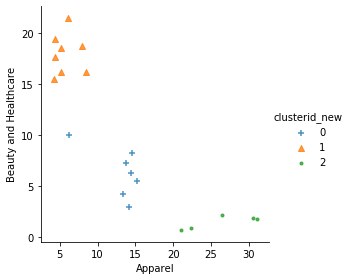

In [12]:
markers = ['+','^','.']
sn.lmplot( "Apparel", "Beauty and Healthcare",data=customers_df,hue = "clusterid_new",fit_reg=False,markers = markers,size = 4 );
#Customer segments created after normalization

In [13]:
clusters.cluster_centers_

array([[14.24666667,  5.73      ],
       [ 5.79777778, 17.09777778],
       [26.32      ,  1.5       ]])

In [14]:
customers_df.groupby( 'clusterid' )['Apparel','Beauty and Healthcare'].agg( ["mean",'std'] ).reset_index() #.groupby used to combine clusterid with rest var

clusterid    Apparel           Beauty and Healthcare          
                  mean       std                  mean       std
0         0  14.246667  0.635662              5.730000  1.963212
1         1   5.797778  1.549006             17.097778  3.260068
2         2  26.320000  4.599130              1.500000  0.659545

### c)Use dendrogram and elbow method to verify if the number of clusters suggested is same as clusters visible in the scatter plot in Question A & B. both give 2 clusters,we go with 3 as odd no.

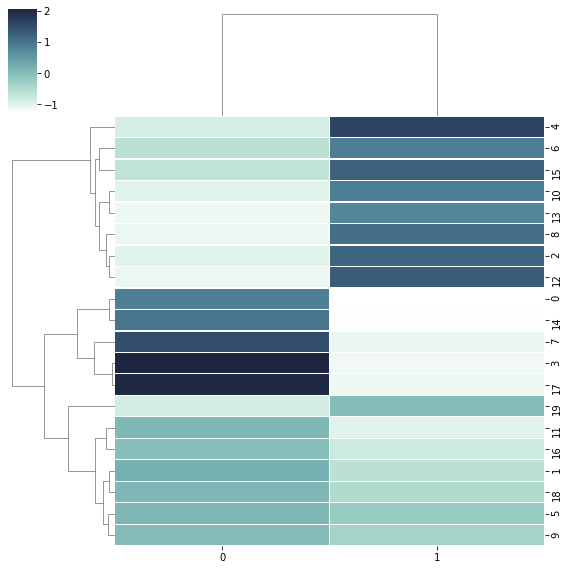

In [15]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_customers_df, cmap=cmap, linewidths=.2,
figsize = (8,8) );
# Dendrogram

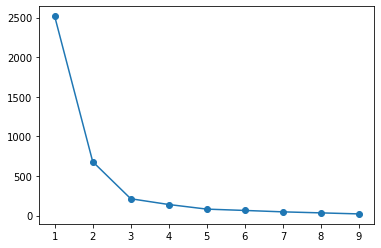

In [16]:
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( customers_df )
    cluster_errors.append( clusters.inertia_ )
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
#Elbow Diagram

### d)Create the number of clusters

In [17]:
k = 3
clusters = KMeans( k, random_state = 62 )
clusters.fit( scaled_customers_df )
customers_df["clusterid"] = clusters.labels_

In [18]:
customers_df[customers_df.clusterid == 0] #Cluster 0 High on apparel and medium spend on beauty

,Apparel,Beauty and Healthcare,clusterid,clusterid_new
1,15.23,5.50,0,0
5,14.50,8.20,0,0
9,13.75,7.30,0,0
11,14.20,2.90,0,0
16,13.40,4.20,0,0
18,14.40,6.28,0,0
19,6.25,9.98,0,0


In [19]:
customers_df[customers_df.clusterid == 1] #Cluster 1 (low sepends on apparel high on beauty)

,Apparel,Beauty and Healthcare,clusterid,clusterid_new
2,5.22,18.6,1,1
4,6.12,21.5,1,1
6,8.50,16.2,1,1
8,4.34,17.7,1,1
10,5.20,16.2,1,1
12,4.40,19.4,1,1
13,4.25,15.5,1,1
15,7.90,18.8,1,1


In [20]:
customers_df[customers_df.clusterid == 2] #cluster2 high apparel and low beauty

,Apparel,Beauty and Healthcare,clusterid,clusterid_new
0,21.1,0.7,2,2
3,31.1,1.8,2,2
7,26.5,2.2,2,2
14,22.3,0.9,2,2
17,30.6,1.9,2,2
